In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ml-latest-small/ratings.csv')
df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [15]:
df2 = pd.read_csv('collecting_imdb/movie_meta.csv')
df2.head(2)

,imdbid,title,director,cast,storyline,keywords,genre,production,color,language,country,rated,runtime,Worldwide_Gross,num_rating
0,114709,toy story (1995),JohnLasseter,tomhanks timallen donrickles,a little boy named andy loves to be in his roo...,toy rivalry cowboy cgi animation claw crane Se...,Genres Animation Adventure Comedy Family Fantasy,Disney Pictures Pixar Animation Studios See more,Color Technicolor,English,USA,G,1h21min,373554033.0,"894,169"
1,113497,jumanji (1995),JoeJohnston,robinwilliams kirstendunst bonniehunt,jumanji one of the most unique and dangerous b...,board game adventurer fight game year 1995 See...,Genres Adventure Comedy Family Fantasy,Pictures Interscope Communications Teitler Fil...,Color Technicolor,English French,USA,P,1h44min,262797249.0,"311,232"


In [17]:
df2.title

0                                toy story (1995)
1                                  jumanji (1995)
2                         grumpier old men (1995)
3                        waiting to exhale (1995)
4              father of the bride part ii (1995)
                          ...                    
9737    kuroshitsuji: book of the atlantic (2017)
9738                  nôgêmu nôraifu: zero (2017)
9739                                 flint (2017)
9740                                          NaN
9741                            dice rules (1991)
Name: title, Length: 9742, dtype: object

In [18]:
df['title'] = df2.title
df.head(3)

,userId,movieId,rating,timestamp,title
0,1,1,4.0,964982703,toy story (1995)
1,1,3,4.0,964981247,jumanji (1995)
2,1,6,4.0,964982224,grumpier old men (1995)


---
# Collabrative Filtering By Hand

In [8]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity

In [202]:
df[df['title'] == "'71 (2014)"]

,userId,movieId,rating,timestamp,title,genres
100728,610,117867,4.0,1493849881,'71 (2014),Action|Drama|Thriller|War


In [50]:
ratings = df.pivot_table(values='rating', index='userId', columns='title')
ratings

title,'71 (2014),'a' gai wak 2 (1987),'breaker' morant (1980),'hellboy': the seeds of creation (2004),'jûsangô taihisen' yori: sono gosôsha o nerae (1960),"'night, mother (1986)",'northwest passage' (book i -- rogers' rangers) (1940),'til there was you (1997),'tis the season for love (2015),(500) days of summer (2009),...,à l'intérieur (2007),à la folie... pas du tout (2002),à ma soeur! (2001),à nous la liberté (1931),á köldum klaka (1995),æon flux (2005),ôdishon (1999),ôkami kodomo no ame to yuki (2012),ônibus 174 (2002),ôritsu uchûgun oneamisu no tsubasa (1987)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,NaN


In [8]:
ratings = ratings.fillna(0)

In [205]:
def standardize(row):
    new_row = (row- row.mean()) / (row.max() - row.min())
    return new_row

ratings_std = ratings.apply(standardize)

In [206]:
ratings_std.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.001639,-0.001639,-0.003279,-0.001639,-0.002623,-0.001639,-0.017705,-0.001639,-0.050492,-0.009426,-0.001639,-0.003893,-0.001639,-0.001639,-0.004918,-0.002049,-0.016885,-0.003747,-0.062459,-0.001639,-0.018852,-0.006089,-0.001639,-0.047377,-0.049508,-0.001639,-0.001639,-0.009107,-0.001639,-0.002004,-0.001639,-0.003279,-0.006148,-0.001639,-0.077541,-0.001639,-0.001639,-0.001639,-0.004918,-0.021129,...,-0.005533,-0.001639,-0.001639,-0.002869,-0.001967,-0.001639,-0.001639,-0.002732,-0.001639,-0.0102,-0.018852,-0.019508,-0.004215,-0.001639,-0.001639,-0.001639,-0.04623,-0.002342,-0.003279,-0.001639,-0.067377,-0.001639,-0.003279,-0.004007,-0.062131,-0.004098,-0.001639,-0.001639,-0.04082,-0.005246,-0.001639,-0.010656,-0.004007,-0.003279,-0.001639,-0.027869,-0.027254,-0.006557,0.773279,-0.001639
2,-0.001639,-0.001639,-0.003279,-0.001639,-0.002623,-0.001639,-0.017705,-0.001639,-0.050492,-0.009426,-0.001639,-0.003893,-0.001639,-0.001639,-0.004918,-0.002049,-0.016885,-0.003747,-0.062459,-0.001639,-0.018852,-0.006089,-0.001639,-0.047377,-0.049508,-0.001639,-0.001639,-0.009107,-0.001639,-0.002004,-0.001639,-0.003279,-0.006148,-0.001639,-0.077541,-0.001639,-0.001639,-0.001639,-0.004918,-0.021129,...,-0.005533,-0.001639,-0.001639,-0.002869,-0.001967,-0.001639,-0.001639,-0.002732,-0.001639,-0.0102,-0.018852,-0.019508,-0.004215,-0.001639,-0.001639,-0.001639,-0.04623,-0.002342,-0.003279,-0.001639,0.532623,-0.001639,-0.003279,-0.004007,-0.062131,-0.004098,-0.001639,-0.001639,-0.04082,-0.005246,-0.001639,-0.010656,-0.004007,-0.003279,-0.001639,-0.027869,-0.027254,-0.006557,-0.026721,-0.001639
3,-0.001639,-0.001639,-0.003279,-0.001639,-0.002623,-0.001639,-0.017705,-0.001639,-0.050492,-0.009426,-0.001639,-0.003893,-0.001639,-0.001639,-0.004918,-0.002049,-0.016885,-0.003747,-0.062459,-0.001639,-0.018852,-0.006089,-0.001639,-0.047377,-0.049508,-0.001639,-0.001639,-

In [208]:
item_simalarity = cosine_similarity(ratings_std.T)
print(ratings_std.T.shape)

(9719, 610)


In [209]:
item_simalarity

array([[ 1.        , -0.00164204, -0.0023241 , ...,  0.32528734,
        -0.00818543, -0.00164204],
       [-0.00164204,  1.        ,  0.706526  , ..., -0.00359434,
        -0.00818543, -0.00164204],
       [-0.0023241 ,  0.706526  ,  1.        , ..., -0.00508734,
        -0.01158546, -0.0023241 ],
       ...,
       [ 0.32528734, -0.00359434, -0.00508734, ...,  1.        ,
        -0.0179175 , -0.00359434],
       [-0.00818543, -0.00818543, -0.01158546, ..., -0.0179175 ,
         1.        , -0.00818543],
       [-0.00164204, -0.00164204, -0.0023241 , ..., -0.00359434,
        -0.00818543,  1.        ]])

In [210]:
item_simalarity_df = pd.DataFrame(item_simalarity, index=ratings.columns, columns=ratings.columns)
item_simalarity_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.000000,-0.001642,-0.002324,-0.001642,-0.002254,-0.001642,-0.006407,-0.001642,0.135943,-0.004325,-0.001642,-0.002795,-0.001642,-0.001642,-0.003182,-0.001992,0.282518,-0.002714,-0.012068,-0.001642,-0.006495,-0.003263,-0.001642,-0.011213,-0.011023,-0.001642,-0.001642,-0.004769,-0.001642,-0.001960,-0.001642,-0.002324,-0.003270,-0.001642,-0.012609,-0.001642,-0.001642,-0.001642,-0.002849,-0.006544,...,-0.003232,-0.001642,-0.001642,0.799645,-0.001933,-0.001642,-0.001642,-0.002279,-0.001642,-0.004356,-0.006130,-0.006329,0.654910,-0.001642,-0.001642,-0.001642,0.209419,0.919045,-0.002324,-0.001642,0.114268,-0.001642,-0.002324,-0.002916,0.143738,-0.002811,-0.001642,-0.001642,0.173520,-0.003193,-0.001642,0.339935,0.542247,0.706526,-0.001642,-0.007675,0.134327,0.325287,-0.008185,-0.001642
'Hellboy': The Seeds of Creation (2004),-0.001642,1.000000,0.706526,-0.001642,-0.002254,-0.001642,-0.006407,-0.001642,-0.010568,-0.004325,-0.001642,0.715035,-0.001642,-0.001642,-0.003182,-0.001992,-0.006092,-0.002714,-0.012068,-0.001642,-0.006495,-0.003263,-0.001642,-0.011213,0.144834,-0.001642,-0.001642,-0.004769,-0.001642,-0.001960,-0.001642,-0.002324,-0.003270,-0.001642,0.117477,-0.001642,-0.001642,-0.001642,-0.002849,-0.006544,...,-0.003232,-0.001642,-0.001642,-0.002301,-0.001933,-0.001642,-0.001642,-0.002279,-0.001642,-0.004356,-0.006130,-0.006329,-0.002772,-0.001642,-0.001642,-0.001642,0.143548,-0.002157,-0.002324,-0.001642,-0.012170,-0.001642,-0.002324,-0.002916,-0.012103,-0.002811,-0.001642,-0.001642,-0.009330,-0.003193,-0.001642,-0.004589,-0.002808,-0.002324,-0.001642,-0.007675,-0.007744,-0.003594,-0.008185,-0.001642
'Round Midnight (1986),-0.002324,0.706526,1.000000,-0.002324,-0.003191,-0.002324,0.170199,-0.002324,-0.014958,-0.006121,0.706526,0.504044,-0.002324,-0.002324,-0.004504,-0.002819,-0.008622,-0.003841,-0.017081,-0.002324,-0.009193,-0.004619,

In [211]:
def get_similar_movies(movie_name, user_rating):
    similar_score = item_simalarity_df[movie_name]  * (user_rating - 2.5)
    similar_score = similar_score.sort_values(ascending=False)

    return similar_score

In [212]:
print(get_similar_movies('Toy Story (1995)', 4)[1:11])

title
Toy Story 2 (1999)                            0.692642
Groundhog Day (1993)                          0.542310
Independence Day (a.k.a. ID4) (1996)          0.537710
Willy Wonka & the Chocolate Factory (1971)    0.535971
Mission: Impossible (1996)                    0.529270
Nutty Professor, The (1996)                   0.525442
Bug's Life, A (1998)                          0.518147
Lion King, The (1994)                         0.516372
Babe (1995)                                   0.511704
Monsters, Inc. (2001)                         0.496220
Name: Toy Story (1995), dtype: float64


In [213]:
person = [('Dark Knight, The (2008)', 3), ('Willy Wonka & the Chocolate Factory (1971)', 5)]

In [214]:
similar_movies = pd.DataFrame()

for movie, rating in person:
  similar_movies = similar_movies.append(get_similar_movies(movie, rating))

In [215]:
similar_movies

,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
"Dark Knight, The (2008)",0.037830,0.032371,0.014909,-0.011303,-0.015519,0.026912,0.024139,-0.011303,0.138407,0.048999,-0.011303,0.012060,0.032371,-0.011303,-0.002705,0.032648,0.095903,0.015153,0.060568,0.026912,0.088372,0.062243,0.026912,0.048069,0.052268,-0.011303,0.015993,0.026154,-0.011303,0.007834,-0.011303,-0.015999,0.025328,-0.011303,0.075922,0.043289,0.026912,0.026912,0.068789,0.077424,...,0.061337,0.026912,0.032371,0.053004,-0.013305,0.032371,0.032371,0.038863,-0.011303,0.001307,0.103305,0.000815,0.056192,-0.011303,0.026912,0.026912,0.157384,0.045399,0.018773,0.043289,0.199457,0.026912,0.014909,0.036335,0.15292,0.066639,-0.011303,0.026912,0.125626,0.011195,0.026912,0.081312,0.059605,0.057407,0.043289,0.002704,0.073489,0.086991,0.055014,-0.011303
Willy Wonka & the Chocolate Factory (1971),-0.048222,-0.048222,-0.068252,-0.048222,0.098055,-0.048222,0.244082,0.175105,0.055643,0.227376,-0.048222,0.017954,-0.048222,-0.048222,0.034783,0.189206,0.023347,0.239952,0.457339,0.207009,0.176865,0.057797,0.207009,0.803760,0.598222,-0.048222,-0.048222,0.182400,-0.048222,-0.002168,-0.048222,0.089794,0.124234,-0.048222,0.299400,0.270817,-0.048222,-0.048222,0.229990,0.213361,...,0.388906,-0.048222,-0.048222,0.066538,0.131005,-0.048222,-0.048222,-0.066923,0.175105,0.268056,0.152437,0.398985,0.014345,-0.048222,0.143201,0.207009,0.248109,0.037244,0.225262,-0.016318,0.328961,0.143201,-0.068252,0.007076,0.66090,0.033968,0.207009,0.207009,0.065261,0.235830,0.207009,0.099797,0.058897,0.112372,-0.048222,0.132500,0.270350,0.131887,0.306007,0.270817


In [216]:
similar_movies.head()
similar_movies.sum().sort_values(ascending=False)[:10]

Willy Wonka & the Chocolate Factory (1971)    2.536239
Wizard of Oz, The (1939)                      1.195408
Who Framed Roger Rabbit? (1988)               1.070940
Nightmare Before Christmas, The (1993)        1.058537
Beetlejuice (1988)                            1.046420
Grease (1978)                                 1.043670
James and the Giant Peach (1996)              1.042582
Mary Poppins (1964)                           1.037344
Edward Scissorhands (1990)                    1.004470
Monty Python and the Holy Grail (1975)        0.988473
dtype: float64

In [217]:
item_simalarity.shape

(9719, 9719)

# SVD by hand (ITEM collab)

In [19]:
ratings = df.pivot_table(columns='title', index='userId', values='rating').fillna(0)
# ratings

In [20]:
X= ratings.T
X.head()

userId,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
'a' gai wak 2 (1987),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'breaker' morant (1980),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'hellboy': the seeds of creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'jûsangô taihisen' yori: sono gosôsha o nerae (1960),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=50, random_state=5)

In [24]:
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(9415, 50)

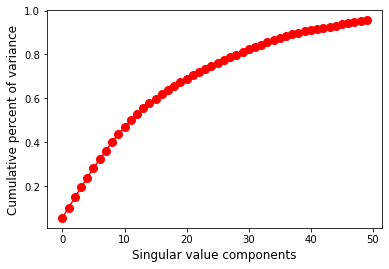

In [25]:
from matplotlib import pyplot as plt
explained = SVD.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 16, color='red')
plt.xlabel('Singular value components', fontsize= 12)
plt.ylabel('Cumulative percent of variance', fontsize=12)        
plt.show()

#### Lookslike most variance explained by 40+ components
#### Will go with 12 compnenets to avoid overfitting

In [45]:
SVD = TruncatedSVD(n_components=12, random_state=5)
resultant_matrix = SVD.fit_transform(X)
resultant_matrix.shape

(9415, 20)

In [46]:
### correlation matrix
corr_mat = np.corrcoef(resultant_matrix)
corr_mat.shape

(9415, 9415)

In [38]:
col_idx = ratings.columns.get_loc("toy story (1995)")
corr_specific = corr_mat[col_idx]
pd.DataFrame({'corr_specific':corr_specific, 'Movies': ratings.columns})\
.sort_values('corr_specific', ascending=False)\
.head(10)

,corr_specific,Movies
8871,1.000000,toy story (1995)
4662,0.944752,jurassic park (1993)
3996,0.942223,home alone (1990)
5862,0.935048,mrs. doubtfire (1993)
713,0.933051,babe (1995)
298,0.925678,aladdin (1992)
3406,0.923790,ghost (1990)
5488,0.922089,"mask, the (1994)"
4337,0.918501,independence day (a.k.a. id4) (1996)
9485,0.917583,willy wonka & the chocolate factory (1971)


In [ ]:
np.save('item_colab_corr.npy', corr_mat)